# Librerias

In [16]:
library(bnlearn)
library(Rgraphviz)

# Datos

In [23]:
# tabla = read.csv("data/ARIA_cleaned/PlanRT.csv", row.names=1)
tabla = read.csv("data/ARIA_cleaned/Sch_categ.csv", row.names=1)

cols = names(tabla)
length(cols)

tabla[cols] <- lapply(tabla[cols], factor)
tabla = tabla[cols]

dim(tabla)
head(tabla)

[1] 60

[1] 19844    60

,ActivityCategoryCode,Duration,NotificationPriorTimeFlag_x,NoEditFlag_x,NotificationPriorTimeFlag_y,ResourceGroupSer,Description,PatientStatus,Priority,AssignableFlag,...,TStage,ObjectStatus_y_4,TumorSize,NStage,DiagnosisCode_sec,SummaryStage,ClinicalStatus,ObjectStatus_sec,DiagnosisCode,HistologyCode_sec
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
54,Treatment,10,0,1,0,12.0,isNaN,Paciente Ingresado,Medium,1,...,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,ACTIVE,isNaN,isNaN,isNaN
55,Treatment,10,0,1,0,12.0,isNaN,Paciente Ingresado,Medium,1,...,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,ACTIVE,isNaN,isNaN,isNaN
56,Treatment,10,0,1,0,12.0,isNaN,Paciente Ingresado,Medium,1,...,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,ACTIVE,isNaN,isNaN,isNaN
57,Treatment,10,0,1,0,12.0,isNaN,Paciente Ingresado,Medium,1,...,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,ACTIVE,isNaN,isNaN,isNaN
62,Treatment,10,0,1,0,12.0,isNaN,Paciente Ingresado,Medium,1,...,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,ACTIVE,isNaN,isNaN,isNaN
663,Treatment,30,0,0,0,isNaN,isNaN,Paciente Ingresado,Medium,1,...,3a,Active,isNaN,1,isNaN,IIB,ACTIVE,isNaN,C61,isNaN


# Análisis de robustez

In [24]:
resample_train = function(tabla, r, n){
    h = vector(mode="list")
    m = nrow(tabla)
    cat("Nº filas en cada resampling:", round(m*r))
    for(i in 1:n){
        i = sample(m, size = round(m*r), replace = FALSE)

        options(warn=-1)
        dag <- hc(tabla[i,])
        strength = arc.strength(dag, data = tabla[i,], criterion = "bic") # x2, aic...
        # score = bnlearn::score(dag, data = tabla[i,], type = "bic")
        # uves = vstructs(dag)
        options(warn=0)

        rank = t(apply(strength[,1:2], 1, sort))
        for(i in 1:nrow(rank)){
            nombre = paste(rank[i,1], rank[i,2], sep=" <-> ")
            if(is.null(h[[nombre]])){
                h[[nombre]] = c(i)
            }else{
                h[[nombre]] = c(h[[nombre]], i)
            }
        }
    }
    return(h)
}

In [25]:
aa = resample_train(tabla, 0.1, 20)
aa

Nº filas en cada resampling: 1984

$`EquipmentSer <-> InterfaceStamp`
 [1] 1 1 2 1 1 2 1 2 2 2 2 1 2 2 1 2 1 2 2 2

$`NoEditFlag_x <-> ResourceGroupSer`
 [1] 2 2 1 2 2 1 2 1 1 1 1 2 1 1 2 1 2 1 1 1

$`ActivityCode <-> NoEditFlag_x`
 [1] 3 3 3 3 3 3 3 3 3 3 3 3

$`NoFractions <-> TreatmentIntentType`
 [1] 4 4 5 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 5 4

$`ActivityCode <-> AssignableFlag`
 [1] 5 5 4 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 4 5

$`NoFractions <-> PrescribedDose`
 [1] 6 6 7 7 6 7 6 7 6 7 6 7 6 6 7 6 6 6 7 6

$`DiagnosisCode <-> NoFractions`
 [1] 7 8 8 8 8 8 8 9 7 9 8 8 9 8 9 8 8 9 9 8

$`DiagnosisCode <-> ObjectStatus_y_4`
 [1] 8 7 6 6 7 6 7 6 8 6 7 6 7 7 6 7 7 7 6 7

$`Duration <-> ScheduledDuration`
 [1]  9  9  9 13  9  9  9  8  9  8  9 10  8  9  8  9  9  8  8  9

$`Intent <-> SkinFlashMargin`
 [1] 10 11 11 10 13 10 10 10 15 10 11 12 12 10 11 10 10 10 10 10

$`SimulationNeeded <-> Status_y`
 [1] 11 12 12 11 11 11 13 11 12 12 12 11 14 11 12 12 12 12 11 12

$`PhaseType <-> SimulationNeeded`
 [1] 12 14 13 12 12 12 14 12 13 13 14 13 15 12 13 14 13 13 12 13

$`SimulationNeeded <-> Technique`
 [1] 13 15 14 14 15 13 15 13 16 15 15 15 16 13 15 15 14 15 14 14

$`NumberOfFractions <-> SimulationNeeded`
 [1] 14 16 17 16 16 16 16 15 18 18 17 17 19 14 16 17 16 17 17 17

$`PlanNormMethod <-> SkinFlashMargin`
 [1] 15 17 16 17 19 14 17 17 20 17 18 19 18 15 19 18 15 16 18 18

$`CalcModelOptionsLen <-> MultiFieldOptFlag`
 [1] 16 13 10 10 15 12 14 14 11 13 16 13 17 14 11 11 14 13 15

$`MStage <-> SummaryStage`
 [1] 17 10 15 19 14 19 11 18 10 14 10  9 10 19 10 13 18 11 16 11

$`SimulationNeeded <-> Site`
 [1] 18 19 19 18 18 18 19 19 19 19 19 18 20 16 18 20 19 19 19 19

$`NoFractions <-> TStage`
 [1] 19 20 20 21 20 21 21 21 17 20 16 14 17 20 20 19 20 20 15 16

$`CalcModelOptionsLen <-> PrimaryPTVSer`
 [1] 20 18 18 15 17 17 18 16 21 16 20 20 18 17 16 17 18 20 20

$`CalcModelOptions <-> PrimaryPTVSer`
 [1] 21 21 21 20 21 20 20 20 21 23 23 21 21 21 21 21 22 21

$`PrimaryPTVSer <-> SimulationNeeded`
 [1] 22 23 22 23 22 22 23 23 22 23 22 22 24 22 22 22 22 22 23 23

$`NoFractions <-> NStage`
 [1] 23 26 26 26 26 26 26 26 26 26 26 24 27 26 26 25 26 26 25 24

$`NoFractions <-> SummaryStage`
[1] 24 25

$`ActivityCode <-> DefaultDuration`
 [1] 25 25 24 27 25 24 24 25 27 24 24 26 22 24 25 24 25 24 24 26

$`ActivityCode <-> Description`
 [1] 26 24 25 25 24 25 25 24 24 25 25 25 26 25 24 26 24 25 26 22

$`EquipmentSer <-> MultiFieldOptFlag`
 [1] 27 27 27 28 27 28 27 27 28 27 27 27 28 27 27 28 28 27 27 27

$`DiagnosisCode_sec <-> ObjectStatus_sec`
 [1] 28 28 28 29 28 27 28 28 29 28 28 28 29 28 28 27 27 28 28 28

$`ClinicalStatus <-> EquipmentSer`
 [1] 29 29 29 30 29 29 29 29 30 29 29 29 30 29 29 29 29 30 29 29

$`MultiFieldOptFlag <-> TreatmentOrientation`
 [1] 30 31 33 36 33 33 31 31 35 35 33 31 35 33 36 35 35 32 31 30

$`MultiFieldOptFlag <-> PlanNormFactor`
 [1] 31 30 30 32 30 32 30 30 31 30 30 30 32 30 30 31 30 31 32 31

$`DicomSeqNumber <-> PrescribedPercentage`
 [1] 32 32 31 34 31 34 32 33 32 32 31 32 33 34 33 32 31 33 33 32

$`PrescribedPercentage <-> Status_x`
 [1] 33 33 32 35 32 35 33 34 33 33 32 33 34 35 34 33 32 34 34 33

$`DicomSeqNumber <-> MultiFieldOptFlag`
 [1] 34 34 35 37 34 36 34 35 34 34 34 35 37 36 35 36 36 35 34

$`DiagnosisCode <-> Sex`
 [1] 35 35 36 31 35 31 35 36 36 36 35 36 36 31 32 34 33 35 30 37

$`DefaultDuration <-> Duration`
 [1] 36 36 34 33 36 30 36 32 38 31 36 34 31 32 31 30 34 29 36 35

$`NoEditFlag_x <-> PrescribedDose`
 [1] 37 37 39 37 39 37 37 37 39 38 38 39 37 37 37 38 38 38 36

$`MultiFieldOptFlag <-> NoFractions`
 [1] 38 39 37 41 38 41 38 40 39 38 39 39 38 41 38 38 37 37 37 38

$`ActualDuration <-> ScheduledDuration`
 [1] 39 43 40 41 38 42 40 40 38 40 40 39 39 41

$`HistologyCode <-> TumorSize`
 [1] 40 38 40 39 39 40 42 40 37 37 37 42 39 41 40 41 41 43 44

$`MStage <-> ObjectStatus_sec`
 [1] 41 41 38 43 42 44 40 41 41 40 40 41 41 40 39 39 39 40 40 39

$`MultiFieldOptFlag <-> SkinFlashMargin`
 [1] 42 42 41  9 43 43 41 43 11 41 43 44 11 42 42 42 42 42 42 42

$`Date

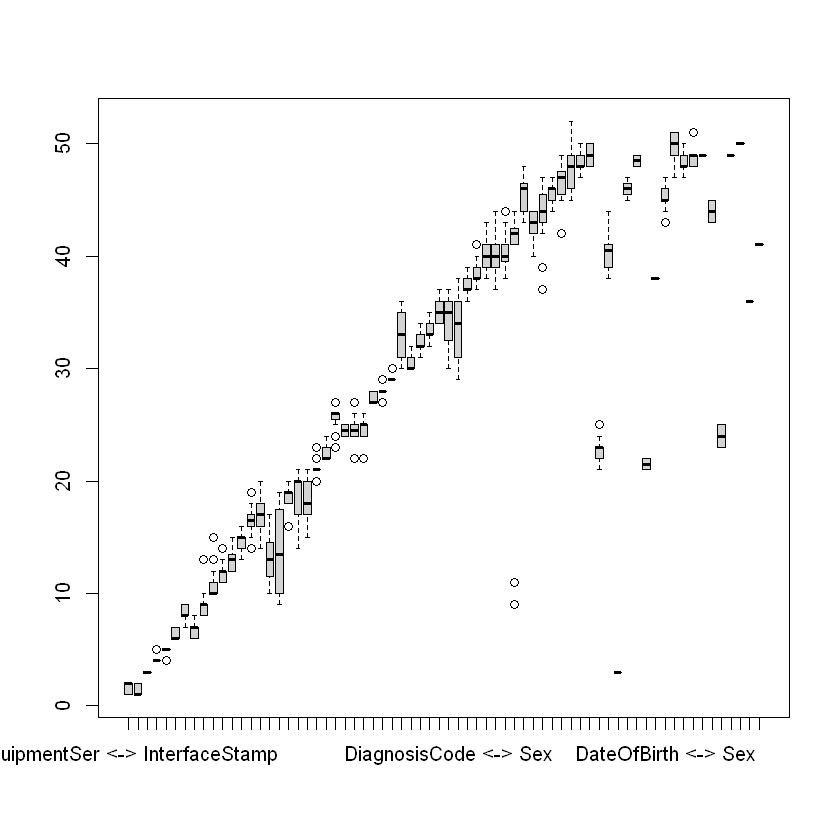

In [26]:
bp = boxplot(aa)

# Plot dag

In [27]:
dag <- hc(tabla)
strength = arc.strength(dag, data = tabla, criterion = "bic")

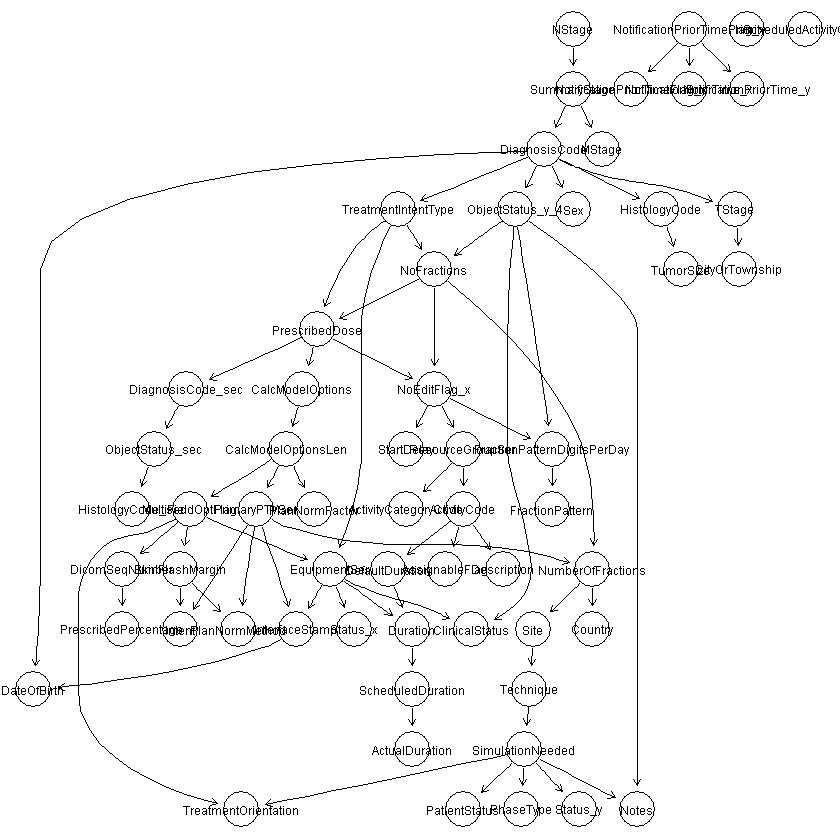

In [28]:
g <- Rgraphviz::layoutGraph(bnlearn::as.graphNEL(dag))
graph::nodeRenderInfo(g) <- list(fontsize=70)
Rgraphviz::renderGraph(g)